In [ ]:
https://www.youtube.com/watch?v=S8tpSG6Q2H0

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from bs4.element import Comment
import requests
import urllib.request
import cssutils
import re
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import time as tim
from datetime import datetime
import dateutil.parser as parser


In [2]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from tensorflow import keras

In [3]:
print("GPU:",len(tf.config.experimental.list_physical_devices('GPU')))

GPU: 0


In [4]:
df=pd.DataFrame(read_csv("VOMM.csv"))

In [5]:
dt=[]
for i in df['valid']:
    dt.append(i.split(" ")[0])
df["Date"]=dt

In [6]:
tm=[]
for i in df['valid']:
    tm.append(int(i.split(" ")[-1].replace(":","")))
df["Time"]=tm

In [7]:
df1=df[104344:]
df1

,station,valid,elevation,sped,Date,Time
104344,VOMM,2001-01-01 06:40,16.0,3.45,2001-01-01,640
104345,VOMM,2001-01-01 09:00,16.0,3.45,2001-01-01,900
104346,VOMM,2001-01-01 12:00,16.0,2.30,2001-01-01,1200
104347,VOMM,2001-01-01 12:40,16.0,8.05,2001-01-01,1240
104348,VOMM,2001-01-01 14:40,16.0,5.75,2001-01-01,1440
...,...,...,...,...,...,...
393391,VOMM,2022-04-14 21:30,16.0,6.90,2022-04-14,2130
393392,VOMM,2022-04-14 22:00,16.0,6.90,2022-04-14,2200
393393,VOMM,2022-04-14 22:30,16.0,6.90,2022-04-14,2230
393394,VOMM,2022-04-14 23:00,16.0,3.45,2022-04-14,2300


In [8]:
mean_value=df['sped'].mean()
df['sped'].fillna(value=mean_value, inplace=True)

In [9]:
df1['Speed']=df1['sped'].mask(df1['sped']<=0.000000,mean_value)

c:\users\ksvas\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
df1['Speed']

In [10]:
dataset=(df['sped'])
dataset = dataset

In [11]:
print(df1['Time'].value_counts())

600     5938
1200    5933
0       5928
1800    5925
300     5924
        ... 
1818       1
2224       1
8          1
1645       1
45         1
Name: Time, Length: 106, dtype: int64


In [12]:
df2=df1.reset_index(drop=True)
df2

,station,valid,elevation,sped,Date,Time,Speed
0,VOMM,2001-01-01 06:40,16.0,3.45,2001-01-01,640,3.45
1,VOMM,2001-01-01 09:00,16.0,3.45,2001-01-01,900,3.45
2,VOMM,2001-01-01 12:00,16.0,2.30,2001-01-01,1200,2.30
3,VOMM,2001-01-01 12:40,16.0,8.05,2001-01-01,1240,8.05
4,VOMM,2001-01-01 14:40,16.0,5.75,2001-01-01,1440,5.75
...,...,...,...,...,...,...,...
289047,VOMM,2022-04-14 21:30,16.0,6.90,2022-04-14,2130,6.90
289048,VOMM,2022-04-14 22:00,16.0,6.90,2022-04-14,2200,6.90
289049,VOMM,2022-04-14 22:30,16.0,6.90,2022-04-14,2230,6.90
289050,VOMM,2022-04-14 23:00,16.0,3.45,2022-04-14,2300,3.45


In [19]:
df_new=df2[['Speed','Time','Date']]

In [14]:
for i in range(len(df2['Time'])):
    k=0
    if(629>=int(df2['Time'][i])>=600):
        df_new.append(df2.loc[[i]])
        k=k+1

In [18]:
for i in range(len(df2['Time'])):
    if(629>=int(df2['Time'][i])>=600):
        print(df2.loc[i])

station                  VOMM
valid        2001-01-02 06:00
elevation                16.0
sped                      2.3
Date               2001-01-02
Time                      600
Speed                     2.3
Name: 14, dtype: object
station                  VOMM
valid        2001-01-03 06:00
elevation                16.0
sped                      2.3
Date               2001-01-03
Time                      600
Speed                     2.3
Name: 35, dtype: object
station                  VOMM
valid        2001-01-04 06:00
elevation                16.0
sped                      9.2
Date               2001-01-04
Time                      600
Speed                     9.2
Name: 50, dtype: object
station                  VOMM
valid        2001-01-05 06:00
elevation                16.0
sped                      9.2
Date               2001-01-05
Time                      600
Speed                     9.2
Name: 70, dtype: object
station                  VOMM
valid        2001-01-06 06:00
elev

Name: 5293, dtype: object
station                  VOMM
valid        2001-10-14 06:00
elevation                16.0
sped                     3.45
Date               2001-10-14
Time                      600
Speed                    3.45
Name: 5315, dtype: object
station                  VOMM
valid        2001-10-15 06:00
elevation                16.0
sped                      0.0
Date               2001-10-15
Time                      600
Speed                6.264725
Name: 5337, dtype: object
station                  VOMM
valid        2001-10-16 06:00
elevation                16.0
sped                     18.4
Date               2001-10-16
Time                      600
Speed                    18.4
Name: 5346, dtype: object
station                  VOMM
valid        2001-10-17 06:00
elevation                16.0
sped                     5.75
Date               2001-10-17
Time                      600
Speed                    5.75
Name: 5355, dtype: object
station                  VOMM


Name: 8782, dtype: object
station                  VOMM
valid        2002-07-13 06:00
elevation                16.0
sped                    10.35
Date               2002-07-13
Time                      600
Speed                   10.35
Name: 8791, dtype: object
station                  VOMM
valid        2002-07-14 06:00
elevation                16.0
sped                    17.25
Date               2002-07-14
Time                      600
Speed                   17.25
Name: 8804, dtype: object
station                  VOMM
valid        2002-07-15 06:00
elevation                16.0
sped                    17.25
Date               2002-07-15
Time                      600
Speed                   17.25
Name: 8817, dtype: object
station                  VOMM
valid        2002-07-16 06:00
elevation                16.0
sped                     13.8
Date               2002-07-16
Time                      600
Speed                    13.8
Name: 8829, dtype: object
station                  VOMM


Name: 12295, dtype: object
station                  VOMM
valid        2003-04-08 06:00
elevation                16.0
sped                      4.6
Date               2003-04-08
Time                      600
Speed                     4.6
Name: 12308, dtype: object
station                  VOMM
valid        2003-04-09 06:00
elevation                16.0
sped                     3.45
Date               2003-04-09
Time                      600
Speed                    3.45
Name: 12322, dtype: object
station                  VOMM
valid        2003-04-10 06:00
elevation                16.0
sped                      4.6
Date               2003-04-10
Time                      600
Speed                     4.6
Name: 12342, dtype: object
station                  VOMM
valid        2003-04-11 06:00
elevation                16.0
sped                     5.75
Date               2003-04-11
Time                      600
Speed                    5.75
Name: 12354, dtype: object
station                  

Name: 18423, dtype: object
station                  VOMM
valid        2003-12-23 06:00
elevation                16.0
sped                     3.45
Date               2003-12-23
Time                      600
Speed                    3.45
Name: 18450, dtype: object
station                  VOMM
valid        2003-12-24 06:00
elevation                16.0
sped                      0.0
Date               2003-12-24
Time                      600
Speed                6.264725
Name: 18477, dtype: object
station                  VOMM
valid        2003-12-25 06:00
elevation                16.0
sped                     5.75
Date               2003-12-25
Time                      600
Speed                    5.75
Name: 18505, dtype: object
station                  VOMM
valid        2003-12-26 06:00
elevation                16.0
sped                     3.45
Date               2003-12-26
Time                      600
Speed                    3.45
Name: 18529, dtype: object
station                  

Name: 23600, dtype: object
station                  VOMM
valid        2004-06-18 06:00
elevation                16.0
sped                     16.1
Date               2004-06-18
Time                      600
Speed                    16.1
Name: 23626, dtype: object
station                  VOMM
valid        2004-06-19 06:00
elevation                16.0
sped                     11.5
Date               2004-06-19
Time                      600
Speed                    11.5
Name: 23658, dtype: object
station                  VOMM
valid        2004-06-20 06:00
elevation                16.0
sped                      9.2
Date               2004-06-20
Time                      600
Speed                     9.2
Name: 23690, dtype: object
station                  VOMM
valid        2004-06-21 06:00
elevation                16.0
sped                      6.9
Date               2004-06-21
Time                      600
Speed                     6.9
Name: 23722, dtype: object
station                  

Name: 29901, dtype: object
station                  VOMM
valid        2005-01-14 06:00
elevation                16.0
sped                     5.75
Date               2005-01-14
Time                      600
Speed                    5.75
Name: 29930, dtype: object
station                  VOMM
valid        2005-01-15 06:00
elevation                16.0
sped                      6.9
Date               2005-01-15
Time                      600
Speed                     6.9
Name: 29961, dtype: object
station                  VOMM
valid        2005-01-16 06:00
elevation                16.0
sped                      4.6
Date               2005-01-16
Time                      600
Speed                     4.6
Name: 29992, dtype: object
station                  VOMM
valid        2005-01-17 06:00
elevation                16.0
sped                     3.45
Date               2005-01-17
Time                      600
Speed                    3.45
Name: 30022, dtype: object
station                  

Name: 37262, dtype: object
station                  VOMM
valid        2005-09-12 06:00
elevation                16.0
sped                     3.45
Date               2005-09-12
Time                      600
Speed                    3.45
Name: 37294, dtype: object
station                  VOMM
valid        2005-09-13 06:00
elevation                16.0
sped                      6.9
Date               2005-09-13
Time                      600
Speed                     6.9
Name: 37326, dtype: object
station                  VOMM
valid        2005-09-14 06:00
elevation                16.0
sped                      6.9
Date               2005-09-14
Time                      600
Speed                     6.9
Name: 37358, dtype: object
station                  VOMM
valid        2005-09-15 06:00
elevation                16.0
sped                     3.45
Date               2005-09-15
Time                      600
Speed                    3.45
Name: 37389, dtype: object
station                  

Name: 44004, dtype: object
station                  VOMM
valid        2006-04-29 06:00
elevation                16.0
sped                      6.9
Date               2006-04-29
Time                      600
Speed                     6.9
Name: 44034, dtype: object
station                  VOMM
valid        2006-04-30 06:00
elevation                16.0
sped                      0.0
Date               2006-04-30
Time                      600
Speed                6.264725
Name: 44063, dtype: object
station                  VOMM
valid        2006-05-01 06:00
elevation                16.0
sped                      0.0
Date               2006-05-01
Time                      600
Speed                6.264725
Name: 44095, dtype: object
station                  VOMM
valid        2006-05-02 06:00
elevation                16.0
sped                      6.9
Date               2006-05-02
Time                      600
Speed                     6.9
Name: 44127, dtype: object
station                  

Name: 51428, dtype: object
station                  VOMM
valid        2006-12-28 06:00
elevation                16.0
sped                     3.45
Date               2006-12-28
Time                      600
Speed                    3.45
Name: 51457, dtype: object
station                  VOMM
valid        2006-12-29 06:00
elevation                16.0
sped                      4.6
Date               2006-12-29
Time                      600
Speed                     4.6
Name: 51487, dtype: object
station                  VOMM
valid        2006-12-30 06:00
elevation                16.0
sped                     3.45
Date               2006-12-30
Time                      600
Speed                    3.45
Name: 51515, dtype: object
station                  VOMM
valid        2006-12-31 06:00
elevation                16.0
sped                     3.45
Date               2006-12-31
Time                      600
Speed                    3.45
Name: 51541, dtype: object
station                  

Name: 59108, dtype: object
station                  VOMM
valid        2007-09-08 06:00
elevation                16.0
sped                     3.45
Date               2007-09-08
Time                      600
Speed                    3.45
Name: 59140, dtype: object
station                  VOMM
valid        2007-09-09 06:00
elevation                16.0
sped                     3.45
Date               2007-09-09
Time                      600
Speed                    3.45
Name: 59171, dtype: object
station                  VOMM
valid        2007-09-10 06:00
elevation                16.0
sped                      2.3
Date               2007-09-10
Time                      600
Speed                     2.3
Name: 59202, dtype: object
station                  VOMM
valid        2007-09-11 06:00
elevation                16.0
sped                      4.6
Date               2007-09-11
Time                      600
Speed                     4.6
Name: 59234, dtype: object
station                  

Name: 66619, dtype: object
station                  VOMM
valid        2008-05-18 06:00
elevation                16.0
sped                     29.9
Date               2008-05-18
Time                      600
Speed                    29.9
Name: 66649, dtype: object
station                  VOMM
valid        2008-05-19 06:00
elevation                16.0
sped                      6.9
Date               2008-05-19
Time                      600
Speed                     6.9
Name: 66681, dtype: object
station                  VOMM
valid        2008-05-20 06:00
elevation                16.0
sped                      6.9
Date               2008-05-20
Time                      600
Speed                     6.9
Name: 66713, dtype: object
station                  VOMM
valid        2008-05-21 06:00
elevation                16.0
sped                      4.6
Date               2008-05-21
Time                      600
Speed                     4.6
Name: 66743, dtype: object
station                  

Name: 72193, dtype: object
station                  VOMM
valid        2008-11-17 06:00
elevation                16.0
sped                      6.9
Date               2008-11-17
Time                      600
Speed                     6.9
Name: 72224, dtype: object
station                  VOMM
valid        2008-11-18 06:00
elevation                16.0
sped                      4.6
Date               2008-11-18
Time                      600
Speed                     4.6
Name: 72256, dtype: object
station                  VOMM
valid        2008-11-19 06:00
elevation                16.0
sped                      9.2
Date               2008-11-19
Time                      600
Speed                     9.2
Name: 72287, dtype: object
station                  VOMM
valid        2008-11-20 06:00
elevation                16.0
sped                      4.6
Date               2008-11-20
Time                      600
Speed                     4.6
Name: 72317, dtype: object
station                  

Name: 77997, dtype: object
station                  VOMM
valid        2009-05-02 06:10
elevation                16.0
sped                      6.9
Date               2009-05-02
Time                      610
Speed                     6.9
Name: 77998, dtype: object
station                  VOMM
valid        2009-05-03 06:00
elevation                16.0
sped                     5.75
Date               2009-05-03
Time                      600
Speed                    5.75
Name: 78053, dtype: object
station                  VOMM
valid        2009-05-03 06:10
elevation                16.0
sped                      4.6
Date               2009-05-03
Time                      610
Speed                     4.6
Name: 78054, dtype: object
station                  VOMM
valid        2009-05-04 06:00
elevation                16.0
sped                      6.9
Date               2009-05-04
Time                      600
Speed                     6.9
Name: 78109, dtype: object
station                  

Name: 85046, dtype: object
station                  VOMM
valid        2009-09-09 06:10
elevation                16.0
sped                      6.9
Date               2009-09-09
Time                      610
Speed                     6.9
Name: 85047, dtype: object
station                  VOMM
valid        2009-09-10 06:00
elevation                16.0
sped                     3.45
Date               2009-09-10
Time                      600
Speed                    3.45
Name: 85102, dtype: object
station                  VOMM
valid        2009-09-10 06:10
elevation                16.0
sped                      4.6
Date               2009-09-10
Time                      610
Speed                     4.6
Name: 85103, dtype: object
station                  VOMM
valid        2009-09-11 06:00
elevation                16.0
sped                     3.45
Date               2009-09-11
Time                      600
Speed                    3.45
Name: 85158, dtype: object
station                  

Name: 92294, dtype: object
station                  VOMM
valid        2010-01-28 06:00
elevation                16.0
sped                      9.2
Date               2010-01-28
Time                      600
Speed                     9.2
Name: 92346, dtype: object
station                  VOMM
valid        2010-01-29 06:00
elevation                16.0
sped                     5.75
Date               2010-01-29
Time                      600
Speed                    5.75
Name: 92395, dtype: object
station                  VOMM
valid        2010-01-29 06:10
elevation                16.0
sped                    10.35
Date               2010-01-29
Time                      610
Speed                   10.35
Name: 92396, dtype: object
station                  VOMM
valid        2010-01-30 06:00
elevation                16.0
sped                     5.75
Date               2010-01-30
Time                      600
Speed                    5.75
Name: 92446, dtype: object
station                  

station                  VOMM
valid        2010-05-18 06:00
elevation                16.0
sped                      6.9
Date               2010-05-18
Time                      600
Speed                     6.9
Name: 97664, dtype: object
station                  VOMM
valid        2010-05-18 06:10
elevation                16.0
sped                    10.35
Date               2010-05-18
Time                      610
Speed                   10.35
Name: 97665, dtype: object
station                  VOMM
valid        2010-05-19 06:00
elevation                16.0
sped                      6.9
Date               2010-05-19
Time                      600
Speed                     6.9
Name: 97707, dtype: object
station                  VOMM
valid        2010-05-19 06:10
elevation                16.0
sped                    17.25
Date               2010-05-19
Time                      610
Speed                   17.25
Name: 97708, dtype: object
station                  VOMM
valid        2010-05-2

Name: 104319, dtype: object
station                  VOMM
valid        2010-09-21 06:10
elevation                16.0
sped                    10.35
Date               2010-09-21
Time                      610
Speed                   10.35
Name: 104320, dtype: object
station                  VOMM
valid        2010-09-22 06:00
elevation                16.0
sped                      0.0
Date               2010-09-22
Time                      600
Speed                6.264725
Name: 104373, dtype: object
station                  VOMM
valid        2010-09-22 06:10
elevation                16.0
sped                     3.45
Date               2010-09-22
Time                      610
Speed                    3.45
Name: 104374, dtype: object
station                  VOMM
valid        2010-09-23 06:00
elevation                16.0
sped                      4.6
Date               2010-09-23
Time                      600
Speed                     4.6
Name: 104420, dtype: object
station             

Name: 112687, dtype: object
station                  VOMM
valid        2011-11-01 06:10
elevation                16.0
sped                      9.2
Date               2011-11-01
Time                      610
Speed                     9.2
Name: 112731, dtype: object
station                  VOMM
valid        2011-11-02 06:10
elevation                16.0
sped                      4.6
Date               2011-11-02
Time                      610
Speed                     4.6
Name: 112769, dtype: object
station                  VOMM
valid        2011-11-03 06:10
elevation                16.0
sped                     8.05
Date               2011-11-03
Time                      610
Speed                    8.05
Name: 112815, dtype: object
station                  VOMM
valid        2011-11-05 06:10
elevation                16.0
sped                      6.9
Date               2011-11-05
Time                      610
Speed                     6.9
Name: 112896, dtype: object
station             

Name: 122530, dtype: object
station                  VOMM
valid        2012-06-08 06:10
elevation                16.0
sped                    14.95
Date               2012-06-08
Time                      610
Speed                   14.95
Name: 122574, dtype: object
station                  VOMM
valid        2012-06-09 06:10
elevation                16.0
sped                     11.5
Date               2012-06-09
Time                      610
Speed                    11.5
Name: 122622, dtype: object
station                  VOMM
valid        2012-06-10 06:10
elevation                16.0
sped                    12.65
Date               2012-06-10
Time                      610
Speed                   12.65
Name: 122670, dtype: object
station                  VOMM
valid        2012-06-11 06:10
elevation                16.0
sped                    10.35
Date               2012-06-11
Time                      610
Speed                   10.35
Name: 122717, dtype: object
station             

Name: 133200, dtype: object
station                  VOMM
valid        2013-01-30 06:10
elevation                16.0
sped                      6.9
Date               2013-01-30
Time                      610
Speed                     6.9
Name: 133287, dtype: object
station                  VOMM
valid        2013-01-31 06:10
elevation                16.0
sped                     8.05
Date               2013-01-31
Time                      610
Speed                    8.05
Name: 133328, dtype: object
station                  VOMM
valid        2013-02-01 06:10
elevation                16.0
sped                    10.35
Date               2013-02-01
Time                      610
Speed                   10.35
Name: 133371, dtype: object
station                  VOMM
valid        2013-02-02 06:10
elevation                16.0
sped                     5.75
Date               2013-02-02
Time                      610
Speed                    5.75
Name: 133414, dtype: object
station             

Name: 145185, dtype: object
station                  VOMM
valid        2013-10-20 06:10
elevation                16.0
sped                      4.6
Date               2013-10-20
Time                      610
Speed                     4.6
Name: 145270, dtype: object
station                  VOMM
valid        2013-10-21 06:10
elevation                16.0
sped                     11.5
Date               2013-10-21
Time                      610
Speed                    11.5
Name: 145314, dtype: object
station                  VOMM
valid        2013-10-23 06:10
elevation                16.0
sped                     8.05
Date               2013-10-23
Time                      610
Speed                    8.05
Name: 145401, dtype: object
station                  VOMM
valid        2013-10-24 06:10
elevation                16.0
sped                      4.6
Date               2013-10-24
Time                      610
Speed                     4.6
Name: 145445, dtype: object
station             

Name: 156630, dtype: object
station                  VOMM
valid        2014-07-04 06:10
elevation                16.0
sped                      9.2
Date               2014-07-04
Time                      610
Speed                     9.2
Name: 156678, dtype: object
station                  VOMM
valid        2014-07-05 06:10
elevation                16.0
sped                      6.9
Date               2014-07-05
Time                      610
Speed                     6.9
Name: 156726, dtype: object
station                  VOMM
valid        2014-07-06 06:10
elevation                16.0
sped                      9.2
Date               2014-07-06
Time                      610
Speed                     9.2
Name: 156765, dtype: object
station                  VOMM
valid        2014-07-07 06:10
elevation                16.0
sped                     13.8
Date               2014-07-07
Time                      610
Speed                    13.8
Name: 156812, dtype: object
station             

Name: 167655, dtype: object
station                  VOMM
valid        2015-03-16 06:10
elevation                16.0
sped                      9.2
Date               2015-03-16
Time                      610
Speed                     9.2
Name: 167701, dtype: object
station                  VOMM
valid        2015-03-17 06:10
elevation                16.0
sped                    10.35
Date               2015-03-17
Time                      610
Speed                   10.35
Name: 167742, dtype: object
station                  VOMM
valid        2015-03-18 06:10
elevation                16.0
sped                      2.3
Date               2015-03-18
Time                      610
Speed                     2.3
Name: 167786, dtype: object
station                  VOMM
valid        2015-03-19 06:10
elevation                16.0
sped                      4.6
Date               2015-03-19
Time                      610
Speed                     4.6
Name: 167831, dtype: object
station             

Name: 178728, dtype: object
station                  VOMM
valid        2015-11-15 06:00
elevation                16.0
sped                      4.6
Date               2015-11-15
Time                      600
Speed                     4.6
Name: 178762, dtype: object
station                  VOMM
valid        2015-11-16 06:00
elevation                16.0
sped                     5.75
Date               2015-11-16
Time                      600
Speed                    5.75
Name: 178810, dtype: object
station                  VOMM
valid        2015-11-17 06:00
elevation                16.0
sped                      6.9
Date               2015-11-17
Time                      600
Speed                     6.9
Name: 178857, dtype: object
station                  VOMM
valid        2015-11-18 06:00
elevation                16.0
sped                     5.75
Date               2015-11-18
Time                      600
Speed                    5.75
Name: 178905, dtype: object
station             

station                  VOMM
valid        2016-05-09 06:00
elevation                16.0
sped                     8.05
Date               2016-05-09
Time                      600
Speed                    8.05
Name: 187007, dtype: object
station                  VOMM
valid        2016-05-10 06:00
elevation                16.0
sped                      6.9
Date               2016-05-10
Time                      600
Speed                     6.9
Name: 187055, dtype: object
station                  VOMM
valid        2016-05-11 06:00
elevation                16.0
sped                     5.75
Date               2016-05-11
Time                      600
Speed                    5.75
Name: 187103, dtype: object
station                  VOMM
valid        2016-05-12 06:00
elevation                16.0
sped                      0.0
Date               2016-05-12
Time                      600
Speed                6.264725
Name: 187151, dtype: object
station                  VOMM
valid        2016-

Name: 195994, dtype: object
station                  VOMM
valid        2016-11-14 06:00
elevation                16.0
sped                     8.05
Date               2016-11-14
Time                      600
Speed                    8.05
Name: 196042, dtype: object
station                  VOMM
valid        2016-11-15 06:00
elevation                16.0
sped                     8.05
Date               2016-11-15
Time                      600
Speed                    8.05
Name: 196089, dtype: object
station                  VOMM
valid        2016-11-16 06:00
elevation                16.0
sped                      6.9
Date               2016-11-16
Time                      600
Speed                     6.9
Name: 196137, dtype: object
station                  VOMM
valid        2016-11-17 06:00
elevation                16.0
sped                     11.5
Date               2016-11-17
Time                      600
Speed                    11.5
Name: 196185, dtype: object
station             

Name: 207160, dtype: object
station                  VOMM
valid        2017-07-06 06:00
elevation                16.0
sped                     13.8
Date               2017-07-06
Time                      600
Speed                    13.8
Name: 207208, dtype: object
station                  VOMM
valid        2017-07-07 06:00
elevation                16.0
sped                     5.75
Date               2017-07-07
Time                      600
Speed                    5.75
Name: 207256, dtype: object
station                  VOMM
valid        2017-07-08 06:00
elevation                16.0
sped                     8.05
Date               2017-07-08
Time                      600
Speed                    8.05
Name: 207304, dtype: object
station                  VOMM
valid        2017-07-09 06:00
elevation                16.0
sped                     11.5
Date               2017-07-09
Time                      600
Speed                    11.5
Name: 207352, dtype: object
station             

Name: 214576, dtype: object
station                  VOMM
valid        2017-12-08 06:00
elevation                16.0
sped                     8.05
Date               2017-12-08
Time                      600
Speed                    8.05
Name: 214624, dtype: object
station                  VOMM
valid        2017-12-09 06:00
elevation                16.0
sped                     3.45
Date               2017-12-09
Time                      600
Speed                    3.45
Name: 214672, dtype: object
station                  VOMM
valid        2017-12-10 06:00
elevation                16.0
sped                      4.6
Date               2017-12-10
Time                      600
Speed                     4.6
Name: 214720, dtype: object
station                  VOMM
valid        2017-12-11 06:00
elevation                16.0
sped                     3.45
Date               2017-12-11
Time                      600
Speed                    3.45
Name: 214768, dtype: object
station             

Name: 226806, dtype: object
station                  VOMM
valid        2018-08-21 06:00
elevation                16.0
sped                    14.95
Date               2018-08-21
Time                      600
Speed                   14.95
Name: 226854, dtype: object
station                  VOMM
valid        2018-08-22 06:00
elevation                16.0
sped                     11.5
Date               2018-08-22
Time                      600
Speed                    11.5
Name: 226900, dtype: object
station                  VOMM
valid        2018-08-23 06:00
elevation                16.0
sped                     13.8
Date               2018-08-23
Time                      600
Speed                    13.8
Name: 226947, dtype: object
station                  VOMM
valid        2018-08-24 06:00
elevation                16.0
sped                     8.05
Date               2018-08-24
Time                      600
Speed                    8.05
Name: 226994, dtype: object
station             

Name: 237697, dtype: object
station                  VOMM
valid        2019-04-06 06:00
elevation                16.0
sped                     8.05
Date               2019-04-06
Time                      600
Speed                    8.05
Name: 237745, dtype: object
station                  VOMM
valid        2019-04-07 06:00
elevation                16.0
sped                     8.05
Date               2019-04-07
Time                      600
Speed                    8.05
Name: 237793, dtype: object
station                  VOMM
valid        2019-04-08 06:00
elevation                16.0
sped                     11.5
Date               2019-04-08
Time                      600
Speed                    11.5
Name: 237841, dtype: object
station                  VOMM
valid        2019-04-09 06:00
elevation                16.0
sped                      9.2
Date               2019-04-09
Time                      600
Speed                     9.2
Name: 237889, dtype: object
station             

Name: 246580, dtype: object
station                  VOMM
valid        2019-10-10 06:00
elevation                16.0
sped                      6.9
Date               2019-10-10
Time                      600
Speed                     6.9
Name: 246628, dtype: object
station                  VOMM
valid        2019-10-11 06:00
elevation                16.0
sped                     5.75
Date               2019-10-11
Time                      600
Speed                    5.75
Name: 246676, dtype: object
station                  VOMM
valid        2019-10-12 06:00
elevation                16.0
sped                     5.75
Date               2019-10-12
Time                      600
Speed                    5.75
Name: 246724, dtype: object
station                  VOMM
valid        2019-10-13 06:00
elevation                16.0
sped                      6.9
Date               2019-10-13
Time                      600
Speed                     6.9
Name: 246772, dtype: object
station             

Name: 256379, dtype: object
station                  VOMM
valid        2020-06-01 06:00
elevation                16.0
sped                      6.9
Date               2020-06-01
Time                      600
Speed                     6.9
Name: 256427, dtype: object
station                  VOMM
valid        2020-06-02 06:00
elevation                16.0
sped                      9.2
Date               2020-06-02
Time                      600
Speed                     9.2
Name: 256475, dtype: object
station                  VOMM
valid        2020-06-03 06:00
elevation                16.0
sped                    10.35
Date               2020-06-03
Time                      600
Speed                   10.35
Name: 256523, dtype: object
station                  VOMM
valid        2020-06-04 06:00
elevation                16.0
sped                     11.5
Date               2020-06-04
Time                      600
Speed                    11.5
Name: 256570, dtype: object
station             

Name: 268652, dtype: object
station                  VOMM
valid        2021-02-13 06:00
elevation                16.0
sped                     3.45
Date               2021-02-13
Time                      600
Speed                    3.45
Name: 268700, dtype: object
station                  VOMM
valid        2021-02-14 06:00
elevation                16.0
sped                      2.3
Date               2021-02-14
Time                      600
Speed                     2.3
Name: 268748, dtype: object
station                  VOMM
valid        2021-02-15 06:00
elevation                16.0
sped                      2.3
Date               2021-02-15
Time                      600
Speed                     2.3
Name: 268796, dtype: object
station                  VOMM
valid        2021-02-16 06:00
elevation                16.0
sped                      4.6
Date               2021-02-16
Time                      600
Speed                     4.6
Name: 268841, dtype: object
station             

Name: 281111, dtype: object
station                  VOMM
valid        2021-11-01 06:00
elevation                16.0
sped                      2.3
Date               2021-11-01
Time                      600
Speed                     2.3
Name: 281159, dtype: object
station                  VOMM
valid        2021-11-02 06:00
elevation                16.0
sped                     5.75
Date               2021-11-02
Time                      600
Speed                    5.75
Name: 281204, dtype: object
station                  VOMM
valid        2021-11-03 06:00
elevation                16.0
sped                      4.6
Date               2021-11-03
Time                      600
Speed                     4.6
Name: 281252, dtype: object
station                  VOMM
valid        2021-11-04 06:00
elevation                16.0
sped                      2.3
Date               2021-11-04
Time                      600
Speed                     2.3
Name: 281300, dtype: object
station             

In [20]:
df_new_f= df_new[df_new['Time'] >=600 ]

In [21]:
df_new_f=df_new_f[629>=df_new_f['Time'] ]

In [22]:
df_Final=df_new_f.reset_index(drop=True)

In [23]:
df_Final

,Speed,Time,Date
0,2.30,600,2001-01-02
1,2.30,600,2001-01-03
2,9.20,600,2001-01-04
3,9.20,600,2001-01-05
4,9.20,600,2001-01-06
...,...,...,...
7979,12.65,600,2022-04-10
7980,13.80,600,2022-04-11
7981,9.20,600,2022-04-12
7982,13.80,600,2022-04-13


In [ ]:
df_Final.to_csv("Final_Dataset_120522.csv",index=0)

In [ ]:
df1x_fin.plot(x='Date',y='sped',kind="bar")

In [ ]:
25000-24271.8

In [ ]:
df1x_fin.to_csv("Final_DATASET_10_05_2022.csv")

In [ ]:
dataset = df1x_fin.values
dataset = dataset.astype('float32')

In [ ]:
df1=df1.set_index('Date')

In [ ]:
df1

In [ ]:
#  ,index_col='Date',parse_dates=True

In [24]:
df=pd.read_csv("Final_Dataset_120522.csv",index_col='Date',parse_dates=True)


In [31]:
df

,Speed
Date,
2001-01-02,2.30
2001-01-03,2.30
2001-01-04,9.20
2001-01-05,9.20
2001-01-06,9.20
...,...
2022-04-10,12.65
2022-04-11,13.80
2022-04-12,9.20


In [27]:
df['Date'] = pd.to_datetime(df.index)

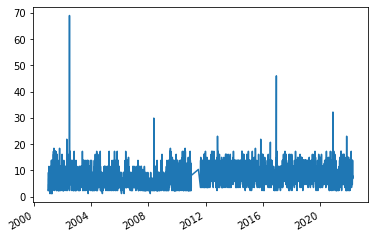

In [32]:
plt.plot(df)
plt.gcf().autofmt_xdate()
plt.show()

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
df

,Speed
Date,
2001-01-02,2.30
2001-01-03,2.30
2001-01-04,9.20
2001-01-05,9.20
2001-01-06,9.20
...,...
2022-04-10,12.65
2022-04-11,13.80
2022-04-12,9.20


In [35]:
df.sort_index(inplace=True)
print(df)

            Speed
Date             
2001-01-02   2.30
2001-01-03   2.30
2001-01-04   9.20
2001-01-05   9.20
2001-01-06   9.20
...           ...
2022-04-10  12.65
2022-04-11  13.80
2022-04-12   9.20
2022-04-13  13.80
2022-04-14   6.90

[7984 rows x 1 columns]


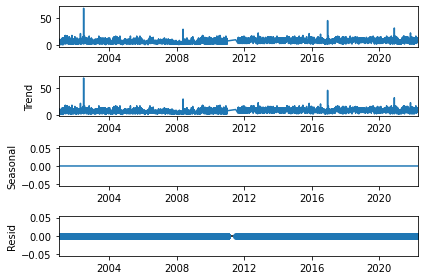

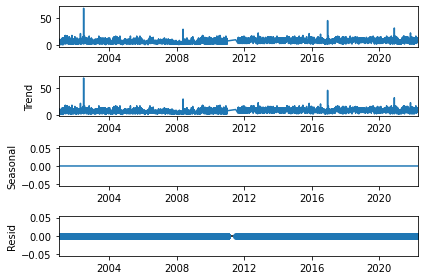

In [36]:
result=seasonal_decompose(df,period=1)
result.plot()

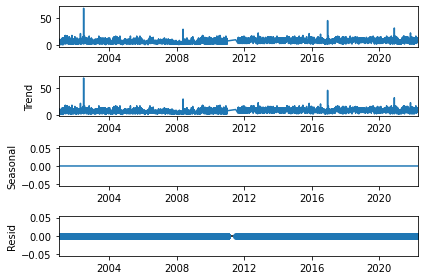

In [37]:
import statsmodels as sm
import statsmodels.api as sm
import matplotlib
decomposition = sm.tsa.seasonal_decompose(df, model = 'additive',period=1)
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

In [ ]:
df

In [38]:
dataset=df
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

In [39]:
scaler=MinMaxScaler()

In [40]:
train_scld=scaler.fit_transform(train)
test_scld=scaler.fit_transform(test)

In [ ]:
train

In [41]:
n_input=366 #3 was the prev input
n_features=1

In [50]:
generator = TimeseriesGenerator(train_scld, train_scld, length=1, batch_size=1)#,stride=3

In [ ]:
# for i in range(100):
#     X,y = generator[i]
#     print(y)

# # print(f'Given the Array: \n{X.flatten()}')


In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [66]:
model = Sequential()
model.add(LSTM(100, input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [68]:
%%time
model.fit(generator,epochs=50)

Epoch 1/50
5348/5348 [==============================] - 9s 1ms/step - loss: 0.0022
Epoch 2/50
5348/5348 [==============================] - 7s 1ms/step - loss: 0.0021
Epoch 3/50
5348/5348 [==============================] - 7s 1ms/step - loss: 0.0021
Epoch 4/50
5348/5348 [==============================] - 7s 1ms/step - loss: 0.0021
Epoch 5/50
5348/5348 [==============================] - 7s 1ms/step - loss: 0.0021
Epoch 6/50
5348/5348 [==============================] - 7s 1ms/step - loss: 0.0021
Epoch 7/50
5348/5348 [==============================] - 7s 1ms/step - loss: 0.0021
Epoch 8/50
5348/5348 [==============================] - 8s 2ms/step - loss: 0.0021
Epoch 9/50
5348/5348 [==============================] - 8s 1ms/step - loss: 0.0021
Epoch 10/50
5348/5348 [==============================] - 8s 1ms/step - loss: 0.0021
Epoch 11/50
5348/5348 [==============================] - 8s 1ms/step - loss: 0.0021
Epoch 12/50
5348/5348 [==============================] - 8s 1ms/step - loss: 0.0021
E

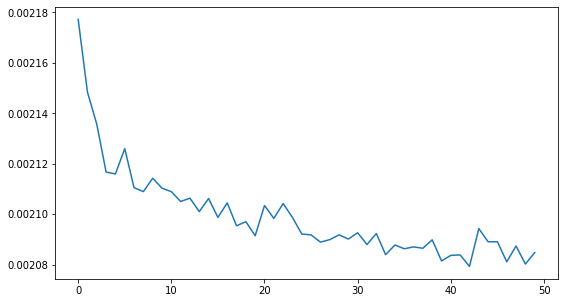

In [69]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [70]:
last_train_batch =train_scld


In [ ]:
last_train_batch = last_train_batch.reshape(( 14,366, n_features))
model.predict(last_train_batch)

In [74]:
5349/366

14.614754098360656

In [ ]:
import numpy as np
test_predictions = []

first_eval_batch = train_scld[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.plot(figsize=(14,5))

Text(0, 0.5, 'Wind Speed in KPH')

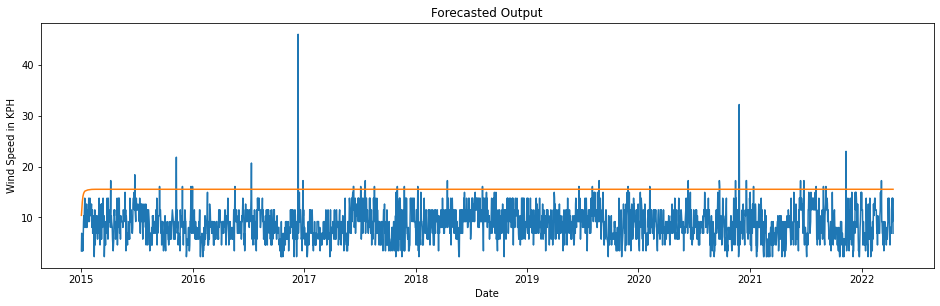

In [81]:
# test['Predictions'][-365:].plot(figsize=(14,5))

plt.plot(test)
plt.title('Forecasted Output')
plt.xlabel('Date')
plt.gcf().set_size_inches(16, 4.5)
plt.ylabel('Wind Speed in KPH')
# plt.savefig('Predictions.jpg')

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Speed'],test['Predictions']))
print(rmse)

7.498963107504979


In [ ]:
test